# numpy array to image
dataset: https://www.kaggle.com/c/facial-keypoints-detection/data

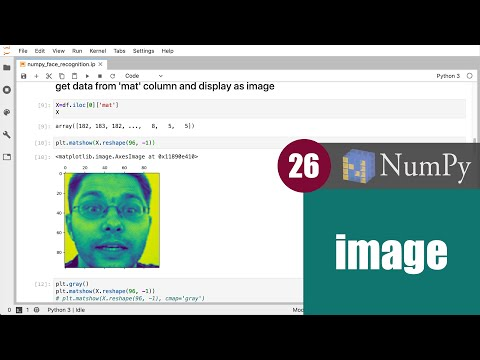

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('MROcF1GVG9o', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')

pandas  version = 1.1.5
numpy   version = 1.19.5


## **read facial data**

In [4]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/face_recog_10faces.csv')
df.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [5]:
np.fromstring('1 2 3 4', dtype=int, sep=' ')

array([1, 2, 3, 4])

In [6]:
df.iloc[0]['Image'][:50]

'182 183 182 182 180 180 176 169 156 137 124 103 79'

In [7]:
X=np.fromstring(df.iloc[0]['Image'], dtype=int, sep=' ')
print(X.shape)
X

(9216,)


array([182, 183, 182, ...,   8,   5,   5])

In [8]:
96*96

9216

## **create numpy array from 'Image' column**

In [9]:
df['mat'] = df.apply(lambda r: np.fromstring(r['Image'], dtype=int, sep=' '), axis=1)
df

,ImageId,Image,mat
0,1,182 183 182 182 180 180 176 169 156 137 124 10...,"[182, 183, 182, 182, 180, 180, 176, 169, 156, ..."
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,"[76, 87, 81, 72, 65, 59, 64, 76, 69, 42, 31, 3..."
2,3,177 176 174 170 169 169 168 166 166 166 161 14...,"[177, 176, 174, 170, 169, 169, 168, 166, 166, ..."
3,4,176 174 174 175 174 174 176 176 175 171 165 15...,"[176, 174, 174, 175, 174, 174, 176, 176, 175, ..."
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...,"[50, 47, 44, 101, 144, 149, 120, 58, 48, 42, 3..."
5,6,177 177 177 171 142 115 97 84 89 90 88 82 63 5...,"[177, 177, 177, 171, 142, 115, 97, 84, 89, 90,..."
6,7,77 55 44 56 58 61 67 66 65 65 65 73 72 78 86 9...,"[77, 55, 44, 56, 58, 61, 67, 66, 65, 65, 65, 7..."
7,8,156 160 162 166 150 114 97 105 125 127 119 121...,"[156, 160, 162, 166, 150, 114, 97, 105, 125, 1..."
8,9,230 230 231 231 231 231 231 231 231 229 214 20...,"[230, 230, 231, 231, 231, 231, 231, 231, 231, ..."
9,10,132 129 126 128 146 163 170 169 143 101 71 55 ...,"[132, 129, 126, 128, 146, 163, 170, 169, 143, ..."


## **get data from 'mat' column and display as image**

In [10]:
X=df.iloc[0]['mat']
X

array([182, 183, 182, ...,   8,   5,   5])

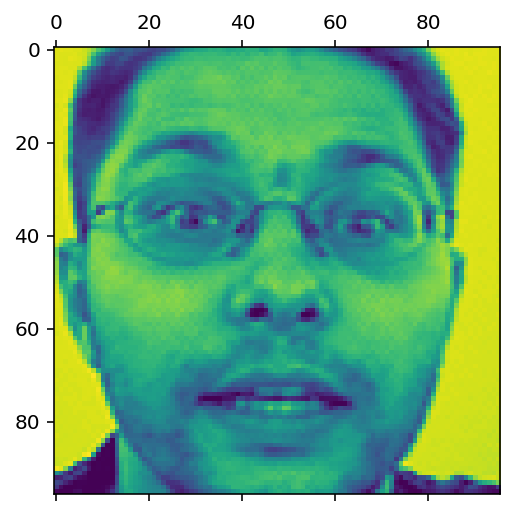

In [11]:
plt.matshow(X.reshape(96, -1))

<Figure size 432x288 with 0 Axes>

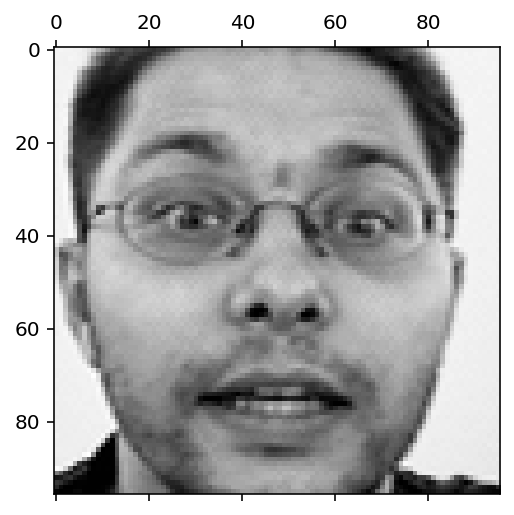

In [12]:
plt.gray()
plt.matshow(X.reshape(96, -1))
# plt.matshow(X.reshape(96, -1), cmap='gray')

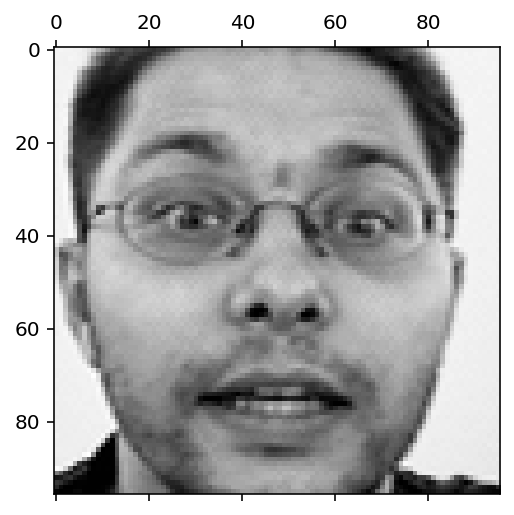

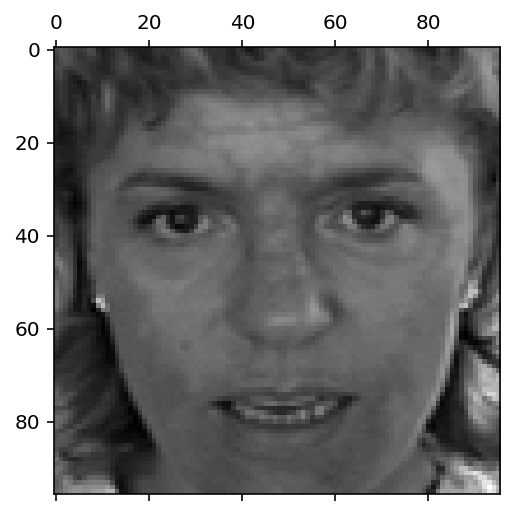

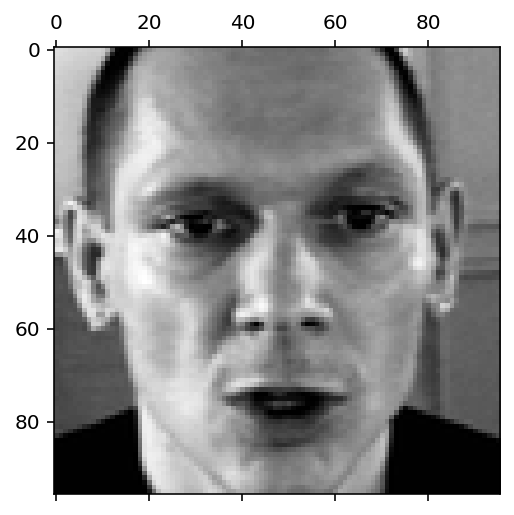

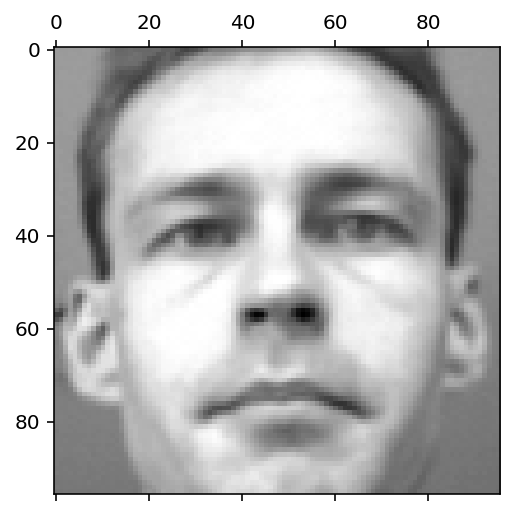

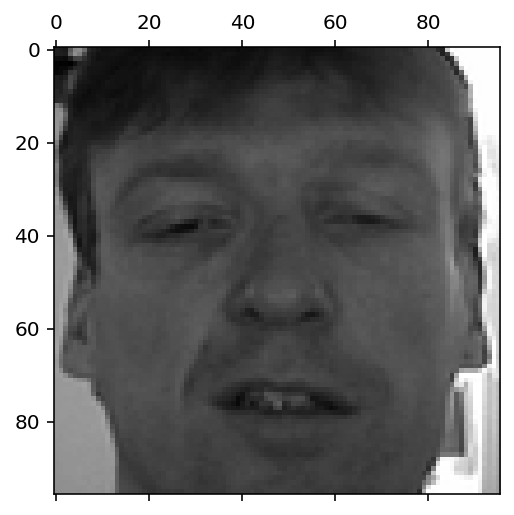

In [13]:
for i in range(5):
    X=df.iloc[i]['mat']
    plt.matshow(X.reshape(96, -1), cmap='gray')

## **vstack df['mat'] to create a single 2D numpy array**

In [14]:
df

,ImageId,Image,mat
0,1,182 183 182 182 180 180 176 169 156 137 124 10...,"[182, 183, 182, 182, 180, 180, 176, 169, 156, ..."
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,"[76, 87, 81, 72, 65, 59, 64, 76, 69, 42, 31, 3..."
2,3,177 176 174 170 169 169 168 166 166 166 161 14...,"[177, 176, 174, 170, 169, 169, 168, 166, 166, ..."
3,4,176 174 174 175 174 174 176 176 175 171 165 15...,"[176, 174, 174, 175, 174, 174, 176, 176, 175, ..."
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...,"[50, 47, 44, 101, 144, 149, 120, 58, 48, 42, 3..."
5,6,177 177 177 171 142 115 97 84 89 90 88 82 63 5...,"[177, 177, 177, 171, 142, 115, 97, 84, 89, 90,..."
6,7,77 55 44 56 58 61 67 66 65 65 65 73 72 78 86 9...,"[77, 55, 44, 56, 58, 61, 67, 66, 65, 65, 65, 7..."
7,8,156 160 162 166 150 114 97 105 125 127 119 121...,"[156, 160, 162, 166, 150, 114, 97, 105, 125, 1..."
8,9,230 230 231 231 231 231 231 231 231 229 214 20...,"[230, 230, 231, 231, 231, 231, 231, 231, 231, ..."
9,10,132 129 126 128 146 163 170 169 143 101 71 55 ...,"[132, 129, 126, 128, 146, 163, 170, 169, 143, ..."


In [15]:
M=np.vstack(df['mat'])
print(M.shape)
M

(10, 9216)


array([[182, 183, 182, ...,   8,   5,   5],
       [ 76,  87,  81, ..., 228, 211, 168],
       [177, 176, 174, ...,   1,   1,   1],
       ...,
       [156, 160, 162, ...,  44,  48,  43],
       [230, 230, 231, ...,  35,  50,  95],
       [132, 129, 126, ...,  67,  71,  87]])

In [16]:
M[1]

array([ 76,  87,  81, ..., 228, 211, 168])

In [17]:
df.iloc[1]['mat']

array([ 76,  87,  81, ..., 228, 211, 168])

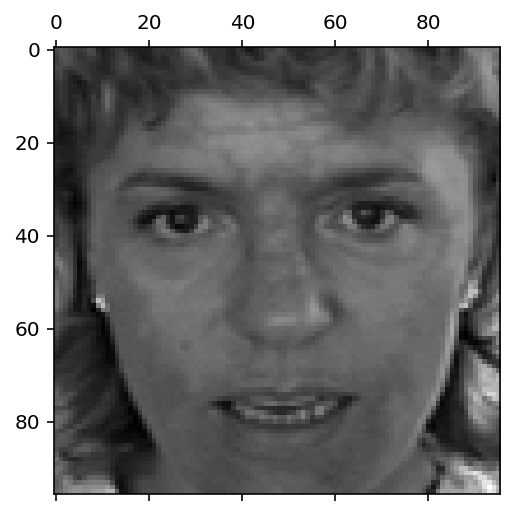

In [18]:
plt.matshow(M[1].reshape(96, -1), cmap='gray')

## **numpy array to image file**

In [19]:
# !conda install Pillow
from PIL import Image # Python Image Library

def numpy_array_to_img(mat: np.ndarray, img_name='img.png'):
    img = Image.fromarray(np.uint8(mat))
    img.save(img_name)

In [20]:
# X=M[1]
X=df.iloc[1]['mat']
X

array([ 76,  87,  81, ..., 228, 211, 168])

In [21]:
X.reshape(96, -1)

array([[ 76,  87,  81, ..., 120, 115, 117],
       [ 68,  85,  84, ..., 132, 111, 106],
       [ 63,  78,  84, ..., 133, 110, 106],
       ...,
       [ 88,  99, 128, ..., 221, 180, 149],
       [ 91,  98, 121, ..., 247, 221, 178],
       [100, 110, 126, ..., 228, 211, 168]])

In [22]:
numpy_array_to_img(X.reshape(96, -1), 'face2.png')

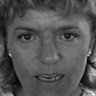

In [23]:
Image.open('face2.png')